# Homework 2

Distinction between Lorenz and Gauss functions. Both functions are restricted to positive independend argument, as
Lorenz function is symetric. Gauss's parameter mu (center) is restricted to pos. values 0 to 5 for that reason. Standard deviation sigma will range from 0,01 to 5. Lorenz function's parameters w_0 goes from 0 to 5 and gamma from 0 to 10.
Functions are evaluated from 0 to 10 with 25 points and fed into a neuronal network with one hot encoding to classify gaussian from lorenzian function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

2023-04-02 20:21:17.286876: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 20:21:17.719799: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 20:21:17.722777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 20:21:19.245260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Defining lorenzian function
def lorenz(x, w_0, gamma):
    return(1/((x**2 - w_0**2)**2 + gamma**2 * w_0**2))

# Defining gaussian function
def gauss(x, mu, sigma):
    return(1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*((x - mu)/sigma)**2))

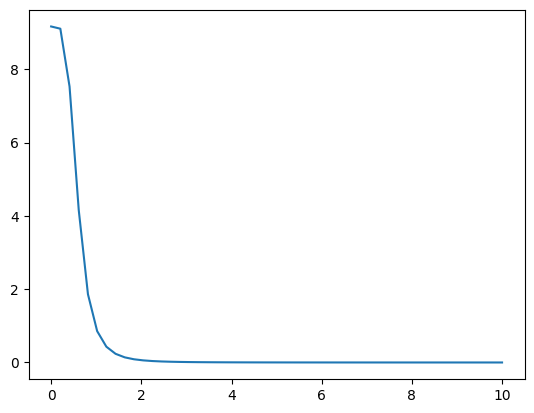

In [11]:
# Debugging and verifying gaussian/lorenzian function

x = np.linspace(0, 10, 50)
fig, ax = plt.subplots()
ax.plot(x, lorenz(x, 0.11, 3))

In [5]:
# Constructing training data set.
training_sample_size = 2000
#Defining on how many function values the function should be evalueted in each sample
function_values_per_sample = 25
# Defining range for independend variable used to contruct gaussian or lorenzian samples
x_min = 0
x_max = 10

# Initializing training samples_labeled, 2 more entries than function values per sample: 2 holding information
# whether gaussian or lorenzian
training_samples_labeled = np.zeros(shape=(training_sample_size, function_values_per_sample + 2))
# Filling funtion values for each sample
for i in range(training_sample_size):
    if np.random.randint(0, 2, size=1):  
        training_samples_labeled[i, 0:function_values_per_sample] = gauss(
            np.linspace(x_min, x_max, function_values_per_sample), 
            np.random.uniform(0, 5, size=1), 
            np.random.uniform(0.01, 5, size=1))
        training_samples_labeled[i, -1] = 1
    else:
        training_samples_labeled[i, 0:function_values_per_sample] = lorenz(
            np.linspace(x_min, x_max, function_values_per_sample), 
            np.random.uniform(0, 5, size=1), 
            np.random.uniform(0, 10, size=1))
        training_samples_labeled[i, -2] = 1

# Substraction mean from every sample for normalization around 0
training_samples_labeled[:, 0:25] -= (training_samples_labeled[:, 0:25].mean(axis=1, keepdims=True))

In [6]:
# Defining neuronal dense net
Net = keras.models.Sequential()
Net.add(keras.layers.Input(shape=(function_values_per_sample,))) # input layer, one neuron per function value
#Net.add(keras.layers.GaussianNoise(0.005)) # Adding noise to prevent over fitting
Net.add(keras.layers.Dense(12, activation='tanh')) # intermediate layer
#Net.add(keras.layers.GaussianNoise(0.05)) # Adding noise to prevent over fitting
Net.add(keras.layers.Dense(12, activation='tanh')) # intermediate layer
#Net.add(keras.layers.Dense(30, activation='tanh')) # intermediate layer
Net.add(keras.layers.Dense(2, activation='softmax')) # For one hot encoding gauss/loranz

Net.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics='categorical_accuracy')

cost = np.array([])

In [7]:
# Validation in new created samples
val_size = 10000
val_target = np.zeros(shape=(val_size, 2))

val_samples = np.zeros(shape=(val_size, function_values_per_sample))
# Filling funtion values for each sample
for i in range(val_size):
    if np.random.randint(0, 2, size=1):  
        val_samples[i, 0:function_values_per_sample] = gauss(
            np.linspace(x_min, x_max, function_values_per_sample), 
            np.random.uniform(0, 5, size=1), 
            np.random.uniform(0.01, 5, size=1))
        val_target[i, -1] = 1
    else:
        val_samples[i, 0:function_values_per_sample] = lorenz(
            np.linspace(x_min, x_max, function_values_per_sample), 
            np.random.uniform(0, 5, size=1), 
            np.random.uniform(0, 10, size=1))
        val_target[i, -2] = 1
        
val_samples -= (val_samples.mean(axis=1, keepdims=True))

history = Net.fit(training_samples_labeled[:, 0:25], 
                  training_samples_labeled[:, -2:], 
                  validation_data=(val_samples, val_target),
                  validation_freq=10, 
                  batch_size=40, epochs=1500)

cost = np.append(cost, history.history['loss'])

Epoch 1/1500
50/50 [==============================] - 1s 2ms/step - loss: 0.6672 - categorical_accuracy: 0.7345
Epoch 2/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.5890 - categorical_accuracy: 0.8840
Epoch 3/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.5010 - categorical_accuracy: 0.9055
Epoch 4/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.4155 - categorical_accuracy: 0.8845
Epoch 5/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.3538 - categorical_accuracy: 0.9065
Epoch 6/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.3157 - categorical_accuracy: 0.9100
Epoch 7/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.2896 - categorical_accuracy: 0.9165
Epoch 8/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.2685 - categorical_accuracy: 0.9210
Epoch 9/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.2531 - categorical_accuracy:

50/50 [==============================] - 0s 7ms/step - loss: 0.0958 - categorical_accuracy: 0.9640 - val_loss: 0.1265 - val_categorical_accuracy: 0.9602
Epoch 71/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0945 - categorical_accuracy: 0.9655
Epoch 72/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0958 - categorical_accuracy: 0.9630
Epoch 73/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0952 - categorical_accuracy: 0.9635
Epoch 74/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.1048 - categorical_accuracy: 0.9665
Epoch 75/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0947 - categorical_accuracy: 0.9670
Epoch 76/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0947 - categorical_accuracy: 0.9675
Epoch 77/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0939 - categorical_accuracy: 0.9660
Epoch 78/1500
50/50 [==============================] - 0

50/50 [==============================] - 0s 2ms/step - loss: 0.0853 - categorical_accuracy: 0.9730
Epoch 139/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0858 - categorical_accuracy: 0.9720
Epoch 140/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0864 - categorical_accuracy: 0.9730 - val_loss: 0.1143 - val_categorical_accuracy: 0.9667
Epoch 141/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0854 - categorical_accuracy: 0.9725
Epoch 142/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0854 - categorical_accuracy: 0.9725
Epoch 143/1500
50/50 [==============================] - 0s 1ms/step - loss: 0.0846 - categorical_accuracy: 0.9705
Epoch 144/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0858 - categorical_accuracy: 0.9715
Epoch 145/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0855 - categorical_accuracy: 0.9715
Epoch 146/1500
50/50 [===========================

50/50 [==============================] - 0s 2ms/step - loss: 0.0801 - categorical_accuracy: 0.9745
Epoch 207/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0791 - categorical_accuracy: 0.9740
Epoch 208/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0821 - categorical_accuracy: 0.9740
Epoch 209/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0801 - categorical_accuracy: 0.9735
Epoch 210/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0785 - categorical_accuracy: 0.9755 - val_loss: 0.1082 - val_categorical_accuracy: 0.9643
Epoch 211/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0820 - categorical_accuracy: 0.9720
Epoch 212/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0781 - categorical_accuracy: 0.9745
Epoch 213/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0796 - categorical_accuracy: 0.9755
Epoch 214/1500
50/50 [===========================

50/50 [==============================] - 0s 2ms/step - loss: 0.0740 - categorical_accuracy: 0.9770
Epoch 275/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0736 - categorical_accuracy: 0.9790
Epoch 276/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0756 - categorical_accuracy: 0.9765
Epoch 277/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0743 - categorical_accuracy: 0.9780
Epoch 278/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0736 - categorical_accuracy: 0.9775
Epoch 279/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0755 - categorical_accuracy: 0.9780
Epoch 280/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0738 - categorical_accuracy: 0.9775 - val_loss: 0.1034 - val_categorical_accuracy: 0.9678
Epoch 281/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0749 - categorical_accuracy: 0.9770
Epoch 282/1500
50/50 [===========================

50/50 [==============================] - 0s 2ms/step - loss: 0.0687 - categorical_accuracy: 0.9805
Epoch 343/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0711 - categorical_accuracy: 0.9765
Epoch 344/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0704 - categorical_accuracy: 0.9780
Epoch 345/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0698 - categorical_accuracy: 0.9820
Epoch 346/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0703 - categorical_accuracy: 0.9820
Epoch 347/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0689 - categorical_accuracy: 0.9825
Epoch 348/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0694 - categorical_accuracy: 0.9825
Epoch 349/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0710 - categorical_accuracy: 0.9790
Epoch 350/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0691 - categorical_accura

Epoch 411/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0658 - categorical_accuracy: 0.9805
Epoch 412/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0669 - categorical_accuracy: 0.9800
Epoch 413/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0645 - categorical_accuracy: 0.9805
Epoch 414/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0644 - categorical_accuracy: 0.9830
Epoch 415/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0642 - categorical_accuracy: 0.9810
Epoch 416/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0653 - categorical_accuracy: 0.9810
Epoch 417/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0640 - categorical_accuracy: 0.9825
Epoch 418/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0629 - categorical_accuracy: 0.9825
Epoch 419/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0647 - cat

50/50 [==============================] - 0s 7ms/step - loss: 0.0581 - categorical_accuracy: 0.9855 - val_loss: 0.1041 - val_categorical_accuracy: 0.9708
Epoch 481/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0585 - categorical_accuracy: 0.9845
Epoch 482/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0575 - categorical_accuracy: 0.9855
Epoch 483/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0583 - categorical_accuracy: 0.9855
Epoch 484/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0594 - categorical_accuracy: 0.9825
Epoch 485/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0589 - categorical_accuracy: 0.9830
Epoch 486/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0581 - categorical_accuracy: 0.9840
Epoch 487/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0581 - categorical_accuracy: 0.9855
Epoch 488/1500
50/50 [===========================

50/50 [==============================] - 0s 2ms/step - loss: 0.0550 - categorical_accuracy: 0.9835
Epoch 549/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0515 - categorical_accuracy: 0.9865
Epoch 550/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0523 - categorical_accuracy: 0.9865 - val_loss: 0.1000 - val_categorical_accuracy: 0.9770
Epoch 551/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0511 - categorical_accuracy: 0.9870
Epoch 552/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0511 - categorical_accuracy: 0.9875
Epoch 553/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0517 - categorical_accuracy: 0.9850
Epoch 554/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0515 - categorical_accuracy: 0.9855
Epoch 555/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0518 - categorical_accuracy: 0.9860
Epoch 556/1500
50/50 [===========================

50/50 [==============================] - 0s 2ms/step - loss: 0.0471 - categorical_accuracy: 0.9880
Epoch 617/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0467 - categorical_accuracy: 0.9880
Epoch 618/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0479 - categorical_accuracy: 0.9865
Epoch 619/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0472 - categorical_accuracy: 0.9870
Epoch 620/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0473 - categorical_accuracy: 0.9875 - val_loss: 0.0986 - val_categorical_accuracy: 0.9779
Epoch 621/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0465 - categorical_accuracy: 0.9850
Epoch 622/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0461 - categorical_accuracy: 0.9880
Epoch 623/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0463 - categorical_accuracy: 0.9880
Epoch 624/1500
50/50 [===========================

50/50 [==============================] - 0s 2ms/step - loss: 0.0441 - categorical_accuracy: 0.9880
Epoch 685/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0425 - categorical_accuracy: 0.9885
Epoch 686/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0443 - categorical_accuracy: 0.9870
Epoch 687/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0424 - categorical_accuracy: 0.9890
Epoch 688/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0423 - categorical_accuracy: 0.9870
Epoch 689/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0445 - categorical_accuracy: 0.9880
Epoch 690/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0421 - categorical_accuracy: 0.9900 - val_loss: 0.0996 - val_categorical_accuracy: 0.9774
Epoch 691/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0426 - categorical_accuracy: 0.9875
Epoch 692/1500
50/50 [===========================

50/50 [==============================] - 0s 2ms/step - loss: 0.0390 - categorical_accuracy: 0.9895
Epoch 753/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0381 - categorical_accuracy: 0.9900
Epoch 754/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0392 - categorical_accuracy: 0.9885
Epoch 755/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0409 - categorical_accuracy: 0.9880
Epoch 756/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0395 - categorical_accuracy: 0.9915
Epoch 757/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0388 - categorical_accuracy: 0.9895
Epoch 758/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0394 - categorical_accuracy: 0.9900
Epoch 759/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0381 - categorical_accuracy: 0.9900
Epoch 760/1500
50/50 [==============================] - 0s 8ms/step - loss: 0.0387 - categorical_accura

Epoch 821/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0379 - categorical_accuracy: 0.9900
Epoch 822/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0349 - categorical_accuracy: 0.9910
Epoch 823/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0358 - categorical_accuracy: 0.9905
Epoch 824/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0356 - categorical_accuracy: 0.9900
Epoch 825/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0369 - categorical_accuracy: 0.9895
Epoch 826/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0356 - categorical_accuracy: 0.9890
Epoch 827/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0357 - categorical_accuracy: 0.9900
Epoch 828/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0355 - categorical_accuracy: 0.9905
Epoch 829/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0358 - cat

50/50 [==============================] - 0s 8ms/step - loss: 0.0339 - categorical_accuracy: 0.9895 - val_loss: 0.1018 - val_categorical_accuracy: 0.9786
Epoch 891/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0328 - categorical_accuracy: 0.9915
Epoch 892/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0324 - categorical_accuracy: 0.9910
Epoch 893/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0353 - categorical_accuracy: 0.9895
Epoch 894/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0349 - categorical_accuracy: 0.9890
Epoch 895/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0346 - categorical_accuracy: 0.9890
Epoch 896/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0327 - categorical_accuracy: 0.9900
Epoch 897/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0330 - categorical_accuracy: 0.9905
Epoch 898/1500
50/50 [===========================

50/50 [==============================] - 0s 2ms/step - loss: 0.0306 - categorical_accuracy: 0.9905
Epoch 959/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0308 - categorical_accuracy: 0.9910
Epoch 960/1500
50/50 [==============================] - 0s 8ms/step - loss: 0.0318 - categorical_accuracy: 0.9910 - val_loss: 0.1023 - val_categorical_accuracy: 0.9800
Epoch 961/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0304 - categorical_accuracy: 0.9905
Epoch 962/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0309 - categorical_accuracy: 0.9915
Epoch 963/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0309 - categorical_accuracy: 0.9910
Epoch 964/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0312 - categorical_accuracy: 0.9920
Epoch 965/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0303 - categorical_accuracy: 0.9925
Epoch 966/1500
50/50 [===========================

50/50 [==============================] - 0s 2ms/step - loss: 0.0301 - categorical_accuracy: 0.9900
Epoch 1027/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0291 - categorical_accuracy: 0.9920
Epoch 1028/1500
50/50 [==============================] - 0s 1ms/step - loss: 0.0285 - categorical_accuracy: 0.9915
Epoch 1029/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0280 - categorical_accuracy: 0.9920
Epoch 1030/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0321 - categorical_accuracy: 0.9890 - val_loss: 0.1129 - val_categorical_accuracy: 0.9790
Epoch 1031/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0294 - categorical_accuracy: 0.9910
Epoch 1032/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0278 - categorical_accuracy: 0.9915
Epoch 1033/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0285 - categorical_accuracy: 0.9915
Epoch 1034/1500
50/50 [===================

50/50 [==============================] - 0s 2ms/step - loss: 0.0262 - categorical_accuracy: 0.9940
Epoch 1095/1500
50/50 [==============================] - 0s 1ms/step - loss: 0.0253 - categorical_accuracy: 0.9945
Epoch 1096/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0266 - categorical_accuracy: 0.9925
Epoch 1097/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0266 - categorical_accuracy: 0.9940
Epoch 1098/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0271 - categorical_accuracy: 0.9920
Epoch 1099/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0264 - categorical_accuracy: 0.9930
Epoch 1100/1500
50/50 [==============================] - 0s 10ms/step - loss: 0.0272 - categorical_accuracy: 0.9905 - val_loss: 0.1173 - val_categorical_accuracy: 0.9787
Epoch 1101/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0257 - categorical_accuracy: 0.9930
Epoch 1102/1500
50/50 [==================

50/50 [==============================] - 0s 2ms/step - loss: 0.0259 - categorical_accuracy: 0.9945
Epoch 1163/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0247 - categorical_accuracy: 0.9930
Epoch 1164/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0243 - categorical_accuracy: 0.9950
Epoch 1165/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0270 - categorical_accuracy: 0.9925
Epoch 1166/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0260 - categorical_accuracy: 0.9920
Epoch 1167/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0256 - categorical_accuracy: 0.9930
Epoch 1168/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0241 - categorical_accuracy: 0.9955
Epoch 1169/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0242 - categorical_accuracy: 0.9935
Epoch 1170/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0239 - categorica

50/50 [==============================] - 0s 7ms/step - loss: 0.0228 - categorical_accuracy: 0.9955 - val_loss: 0.1133 - val_categorical_accuracy: 0.9841
Epoch 1231/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0248 - categorical_accuracy: 0.9945
Epoch 1232/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0234 - categorical_accuracy: 0.9945
Epoch 1233/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0233 - categorical_accuracy: 0.9945
Epoch 1234/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0228 - categorical_accuracy: 0.9960
Epoch 1235/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0237 - categorical_accuracy: 0.9950
Epoch 1236/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0236 - categorical_accuracy: 0.9950
Epoch 1237/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0249 - categorical_accuracy: 0.9930
Epoch 1238/1500
50/50 [===================

50/50 [==============================] - 0s 2ms/step - loss: 0.0204 - categorical_accuracy: 0.9960
Epoch 1299/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0221 - categorical_accuracy: 0.9940
Epoch 1300/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0217 - categorical_accuracy: 0.9960 - val_loss: 0.1117 - val_categorical_accuracy: 0.9837
Epoch 1301/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0215 - categorical_accuracy: 0.9945
Epoch 1302/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0209 - categorical_accuracy: 0.9955
Epoch 1303/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0209 - categorical_accuracy: 0.9955
Epoch 1304/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0215 - categorical_accuracy: 0.9950
Epoch 1305/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0214 - categorical_accuracy: 0.9955
Epoch 1306/1500
50/50 [===================

50/50 [==============================] - 0s 2ms/step - loss: 0.0203 - categorical_accuracy: 0.9955
Epoch 1367/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0200 - categorical_accuracy: 0.9965
Epoch 1368/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0198 - categorical_accuracy: 0.9955
Epoch 1369/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0204 - categorical_accuracy: 0.9955
Epoch 1370/1500
50/50 [==============================] - 0s 8ms/step - loss: 0.0199 - categorical_accuracy: 0.9970 - val_loss: 0.1136 - val_categorical_accuracy: 0.9810
Epoch 1371/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0218 - categorical_accuracy: 0.9950
Epoch 1372/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0215 - categorical_accuracy: 0.9955
Epoch 1373/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0229 - categorical_accuracy: 0.9945
Epoch 1374/1500
50/50 [===================

50/50 [==============================] - 0s 2ms/step - loss: 0.0215 - categorical_accuracy: 0.9945
Epoch 1435/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0198 - categorical_accuracy: 0.9945
Epoch 1436/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0182 - categorical_accuracy: 0.9965
Epoch 1437/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0192 - categorical_accuracy: 0.9955
Epoch 1438/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0184 - categorical_accuracy: 0.9965
Epoch 1439/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0187 - categorical_accuracy: 0.9960
Epoch 1440/1500
50/50 [==============================] - 0s 7ms/step - loss: 0.0202 - categorical_accuracy: 0.9955 - val_loss: 0.1053 - val_categorical_accuracy: 0.9852
Epoch 1441/1500
50/50 [==============================] - 0s 2ms/step - loss: 0.0187 - categorical_accuracy: 0.9965
Epoch 1442/1500
50/50 [===================

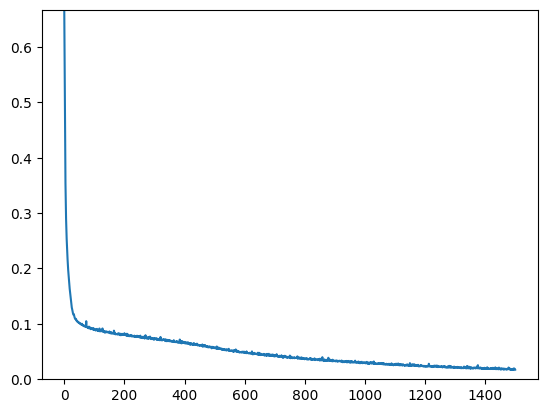

In [8]:
# Plotting cost function
fig, ax = plt.subplots()
ax.set_ylim([0, cost.max()])
ax.plot(range(cost.shape[0]), cost)

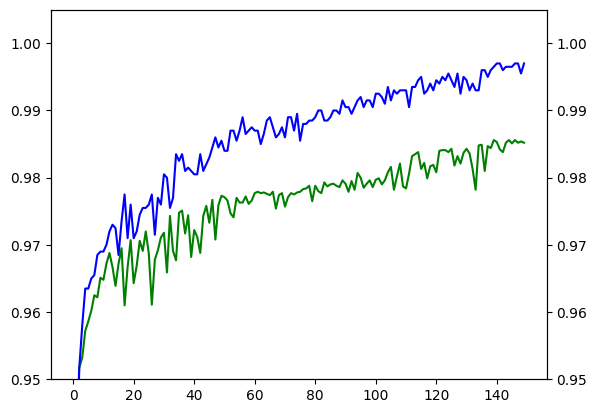

In [9]:
# Plotting accuracies
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.sharey(ax)
ax.set_ylim([0.95, 1.005])
ax2.set_ylim([0.95, 1.005])
ax.plot(range(len(history.history['val_categorical_accuracy'])), 
        history.history['val_categorical_accuracy'], 
       color='green')
ax2.plot(range(len(history.history['categorical_accuracy'][::10])), 
         history.history['categorical_accuracy'][::10],
        color='blue')

In [268]:
# Performance measured by prediction on TRAINING samples
result = Net.predict(training_samples_labeled[:, 0:25])

63/63 [==============================] - 0s 1ms/step


In [269]:
# Calculating bool values from one-hot-encoding
result_compressed = result[:, 0] < result[:, 1]
# Extracting bool values from training samples
training_compressed = training_samples_labeled[:, -2:-1] < training_samples_labeled[:, -1:]
training_compressed = training_compressed.flatten()

# Calculating fraction of correct predictions
richtige = 0
for i in range(result_compressed.shape[0]):
    if (training_compressed[i] == result_compressed[i]):
        richtige += 1
print(richtige / training_sample_size)

0.9975


In [271]:
# Validation in new created samples
val_size = 10000
val_target = np.zeros(shape=(val_size, 2))

val_samples = np.zeros(shape=(val_size, function_values_per_sample))
# Filling funtion values for each sample
for i in range(val_size):
    if np.random.randint(0, 2, size=1):  
        val_samples[i, 0:function_values_per_sample] = gauss(
            np.linspace(x_min, x_max, function_values_per_sample), 
            np.random.uniform(0, 5, size=1), 
            np.random.uniform(0.01, 5, size=1))
        val_target[i, -1] = 1
    else:
        val_samples[i, 0:function_values_per_sample] = lorenz(
            np.linspace(x_min, x_max, function_values_per_sample), 
            np.random.uniform(0, 5, size=1), 
            np.random.uniform(0, 10, size=1))
        val_target[i, -2] = 1

val_samples -= (val_samples.mean(axis=1, keepdims=True))
val_result = Net.predict(val_samples)
val_result_compressed = val_result[:, 0] < val_result[:, 1]
val_target_compressed = val_target[:, 0] < val_target[:, 1]

richtige = 0
for i in range(val_size):
    if (val_result_compressed[i] == val_target_compressed[i]):
        richtige += 1
        
print(richtige / val_size)

313/313 [==============================] - 0s 1ms/step
0.9831


In [255]:
history.history['val_categorical_accuracy']

[0.9189000129699707,
 0.8999000191688538,
 0.8675000071525574,
 0.9003000259399414,
 0.9045000076293945,
 0.9158999919891357,
 0.9162999987602234,
 0.9218999743461609,
 0.9265999794006348,
 0.928600013256073,
 0.9308000206947327,
 0.9311000108718872,
 0.9332000017166138,
 0.9369000196456909,
 0.9363999962806702,
 0.9384999871253967,
 0.9405999779701233,
 0.9413999915122986,
 0.9433000087738037,
 0.9416000247001648,
 0.9448000192642212,
 0.9449999928474426,
 0.9458000063896179,
 0.9474999904632568,
 0.9488999843597412,
 0.9491999745368958,
 0.9491000175476074,
 0.9508000016212463,
 0.9503999948501587,
 0.9519000053405762,
 0.9524000287055969,
 0.9532999992370605,
 0.9544000029563904,
 0.9534000158309937,
 0.9542999863624573,
 0.9549999833106995,
 0.9559999704360962,
 0.954800009727478,
 0.949400007724762,
 0.9559999704360962,
 0.9564999938011169,
 0.9524000287055969,
 0.9573000073432922,
 0.9581999778747559,
 0.954200029373169,
 0.9592999815940857,
 0.9564999938011169,
 0.95529997348785

In [260]:
len(history.history['val_categorical_accuracy'])

500